In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("Phishing.csv")
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [5]:
df.columns[0]

'having_IP_Address'

In [5]:
df.shape

(11055, 31)

# Check for duplicates values

In [7]:
df.duplicated().sum()

5206

In [8]:
df.drop_duplicates(inplace = True) # Dropping duplicates

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(5849, 31)

# Check for Null values

In [12]:
df.isnull().sum().sum() # No Null values

0

In [15]:
df[col].isnull() 

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

# Check if target is balanced or imbalanced

In [14]:
df["Result"].value_counts() #Class is not imbalanced as they are in ratio of approx 3:2

Result
-1    3019
 1    2830
Name: count, dtype: int64

In [15]:
# Check for SD to see if there is any columns with SD = 0. 

In [16]:
df.describe() # Looks like all the coloumns have fair bit of deviation which is good for model training

having_IP_Address   URL_Length  Shortining_Service  having_At_Symbol  \
count        5849.000000  5849.000000         5849.000000       5849.000000   
mean            0.132843    -0.616003            0.720294          0.588648   
std             0.991222     0.777323            0.693728          0.808459   
min            -1.000000    -1.000000           -1.000000         -1.000000   
25%            -1.000000    -1.000000            1.000000          1.000000   
50%             1.000000    -1.000000            1.000000          1.000000   
75%             1.000000    -1.000000            1.000000          1.000000   
max             1.000000     1.000000            1.000000          1.000000   

       double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  \
count               5849.000000    5849.000000        5849.000000   
mean                   0.718242      -0.760301           0.065823   
std                    0.695852       0.649627           0.802448   
min                   -1.000000      -1.000000          -1.000000   
25%                    1.000000      -1.000000          -1.000000   
50%                    1.000000      -1.000000           0.000000   
75%                    1.000000      -1.000000           1.000000   
max                    1.000000       1.000000           1.000000   

       SSLfinal_State  Domain_registeration_length      Favicon         port  \
count     5849.000000                  5849.000000  5849.000000  5849.000000   
mean         0.149085                    -0.305864     0.581809     0.677552   
std          0.924473                     0.952157     0.813395     0.735538   
min         -1.000000                    -1.000000    -1.000000    -1.000000   
25%         -1.000000                    -1.000000     1.000000     1.000000   
50%          1.000000                    -1.000000     1.000000     1.000000   
75%          1.000000                     1.000000     1.000000     1.000000   
max          1.000000                     1.000000     1.000000     1.000000   

       HTTPS_token  Request_URL  URL_of_Anchor  Links_in_tags          SFH  \
count  5849.000000  5849.000000    5849.000000    5849.000000  5849.000000   
mean      0.653616     0.120875      -0.138485      -0.146863    -0.584544   
std       0.756891     0.992753       0.725940       0.769730     0.754880   
min      -1.000000    -1.000000      -1.000000      -1.000000    -1.000000   
25%       1.000000    -1.000000      -1.000000      -1.000000    -1.000000   
50%       1.000000     1.000000       0.000000       0.000000    -1.000000   
75%       1.000000     1.000000       0.000000       0.000000     0.000000   
max       1.000000     1.000000       1.000000       1.000000     1.000000   

       Submitting_to_email  Abnormal_URL     Redirect  on_mouseover  \
count          5849.000000   5849.000000  5849.000000   5849.000000   
mean              0.574970      0.678236     0.131817      0.723030   
std               0.818244      0.734907     0.338321      0.690876   
min              -1.000000     -1.000000     0.000000     -1.000000   
25%               1.000000      1.000000     0.000000      1.000000   
50%               1.000000      1.000000     0.000000      1.000000   
75%               1.000000      1.000000     0.000000      1.000000   
max               1.000000      1.000000     1.000000      1.000000   

        RightClick  popUpWidnow       Iframe  age_of_domain    DNSRecord  \
count  5849.000000  5849.000000  5849.000000    5849.000000  5849.000000   
mean      0.901864     0.564028     0.785604       0.021371     0.475124   
std       0.432058     0.825826     0.618782       0.999857     0.879994   
min      -1.000000    -1.000000    -1.000000      -1.000000    -1.000000   
25%       1.000000     1.000000     1.000000      -1.000000    -1.000000   
50%       1.000000     1.000000     1.000000       1.000000     1.000000   
75%       1.000000     1.000000     1.000000       1.000000     1.000000   
m

In [17]:
# Visualization of Data

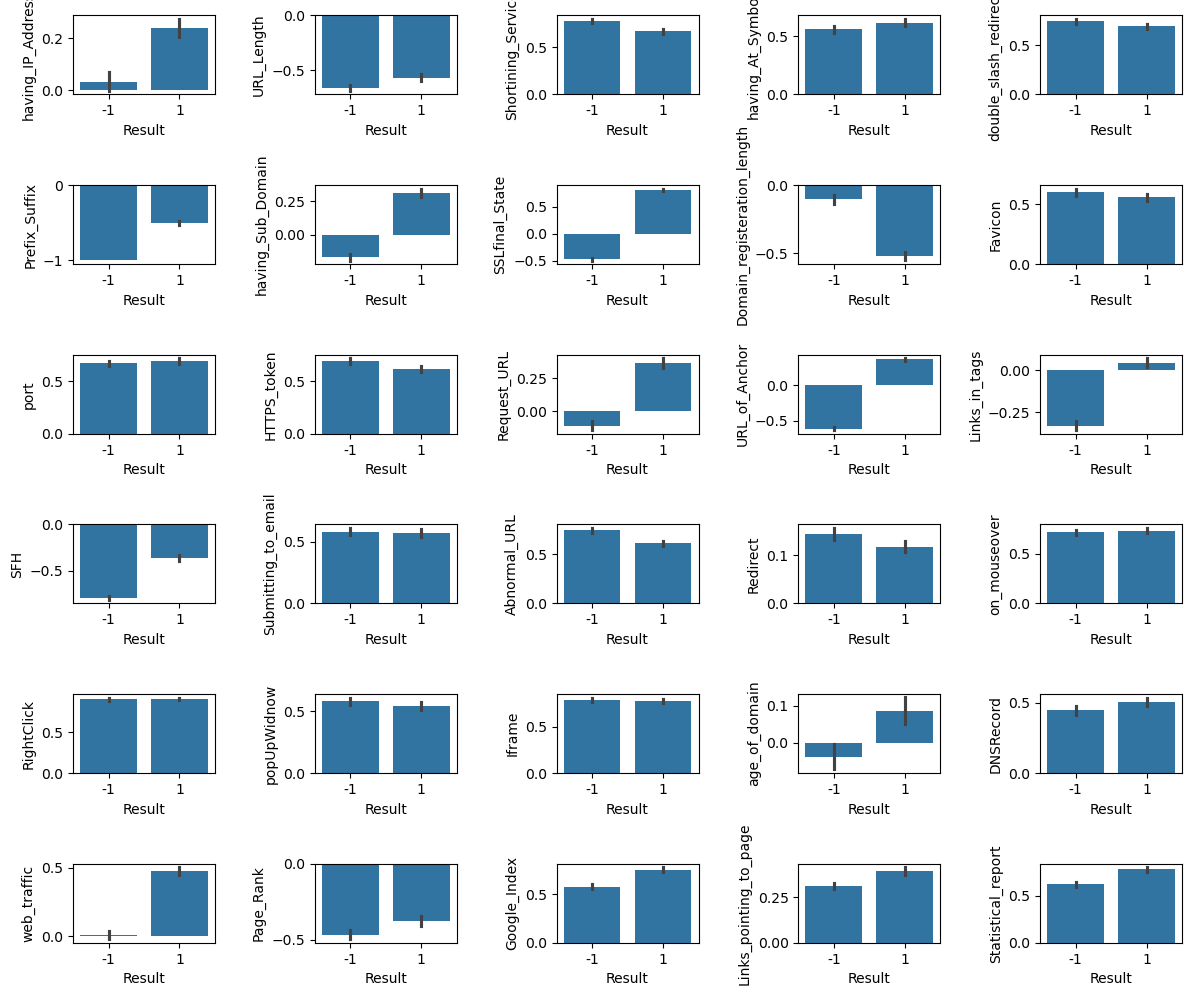

In [18]:
plt.figure(figsize=(12, 13))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(8,5,i+1)
    sns.barplot(df, y = col, x = "Result")
plt.tight_layout(pad=1.0, w_pad=2 , h_pad=3.0)
plt.show()

In [19]:
# Insight - Over all the classes (-1,1) are equally distribted amoung features barring 2 or 3 columns

# Lets find the corelation 

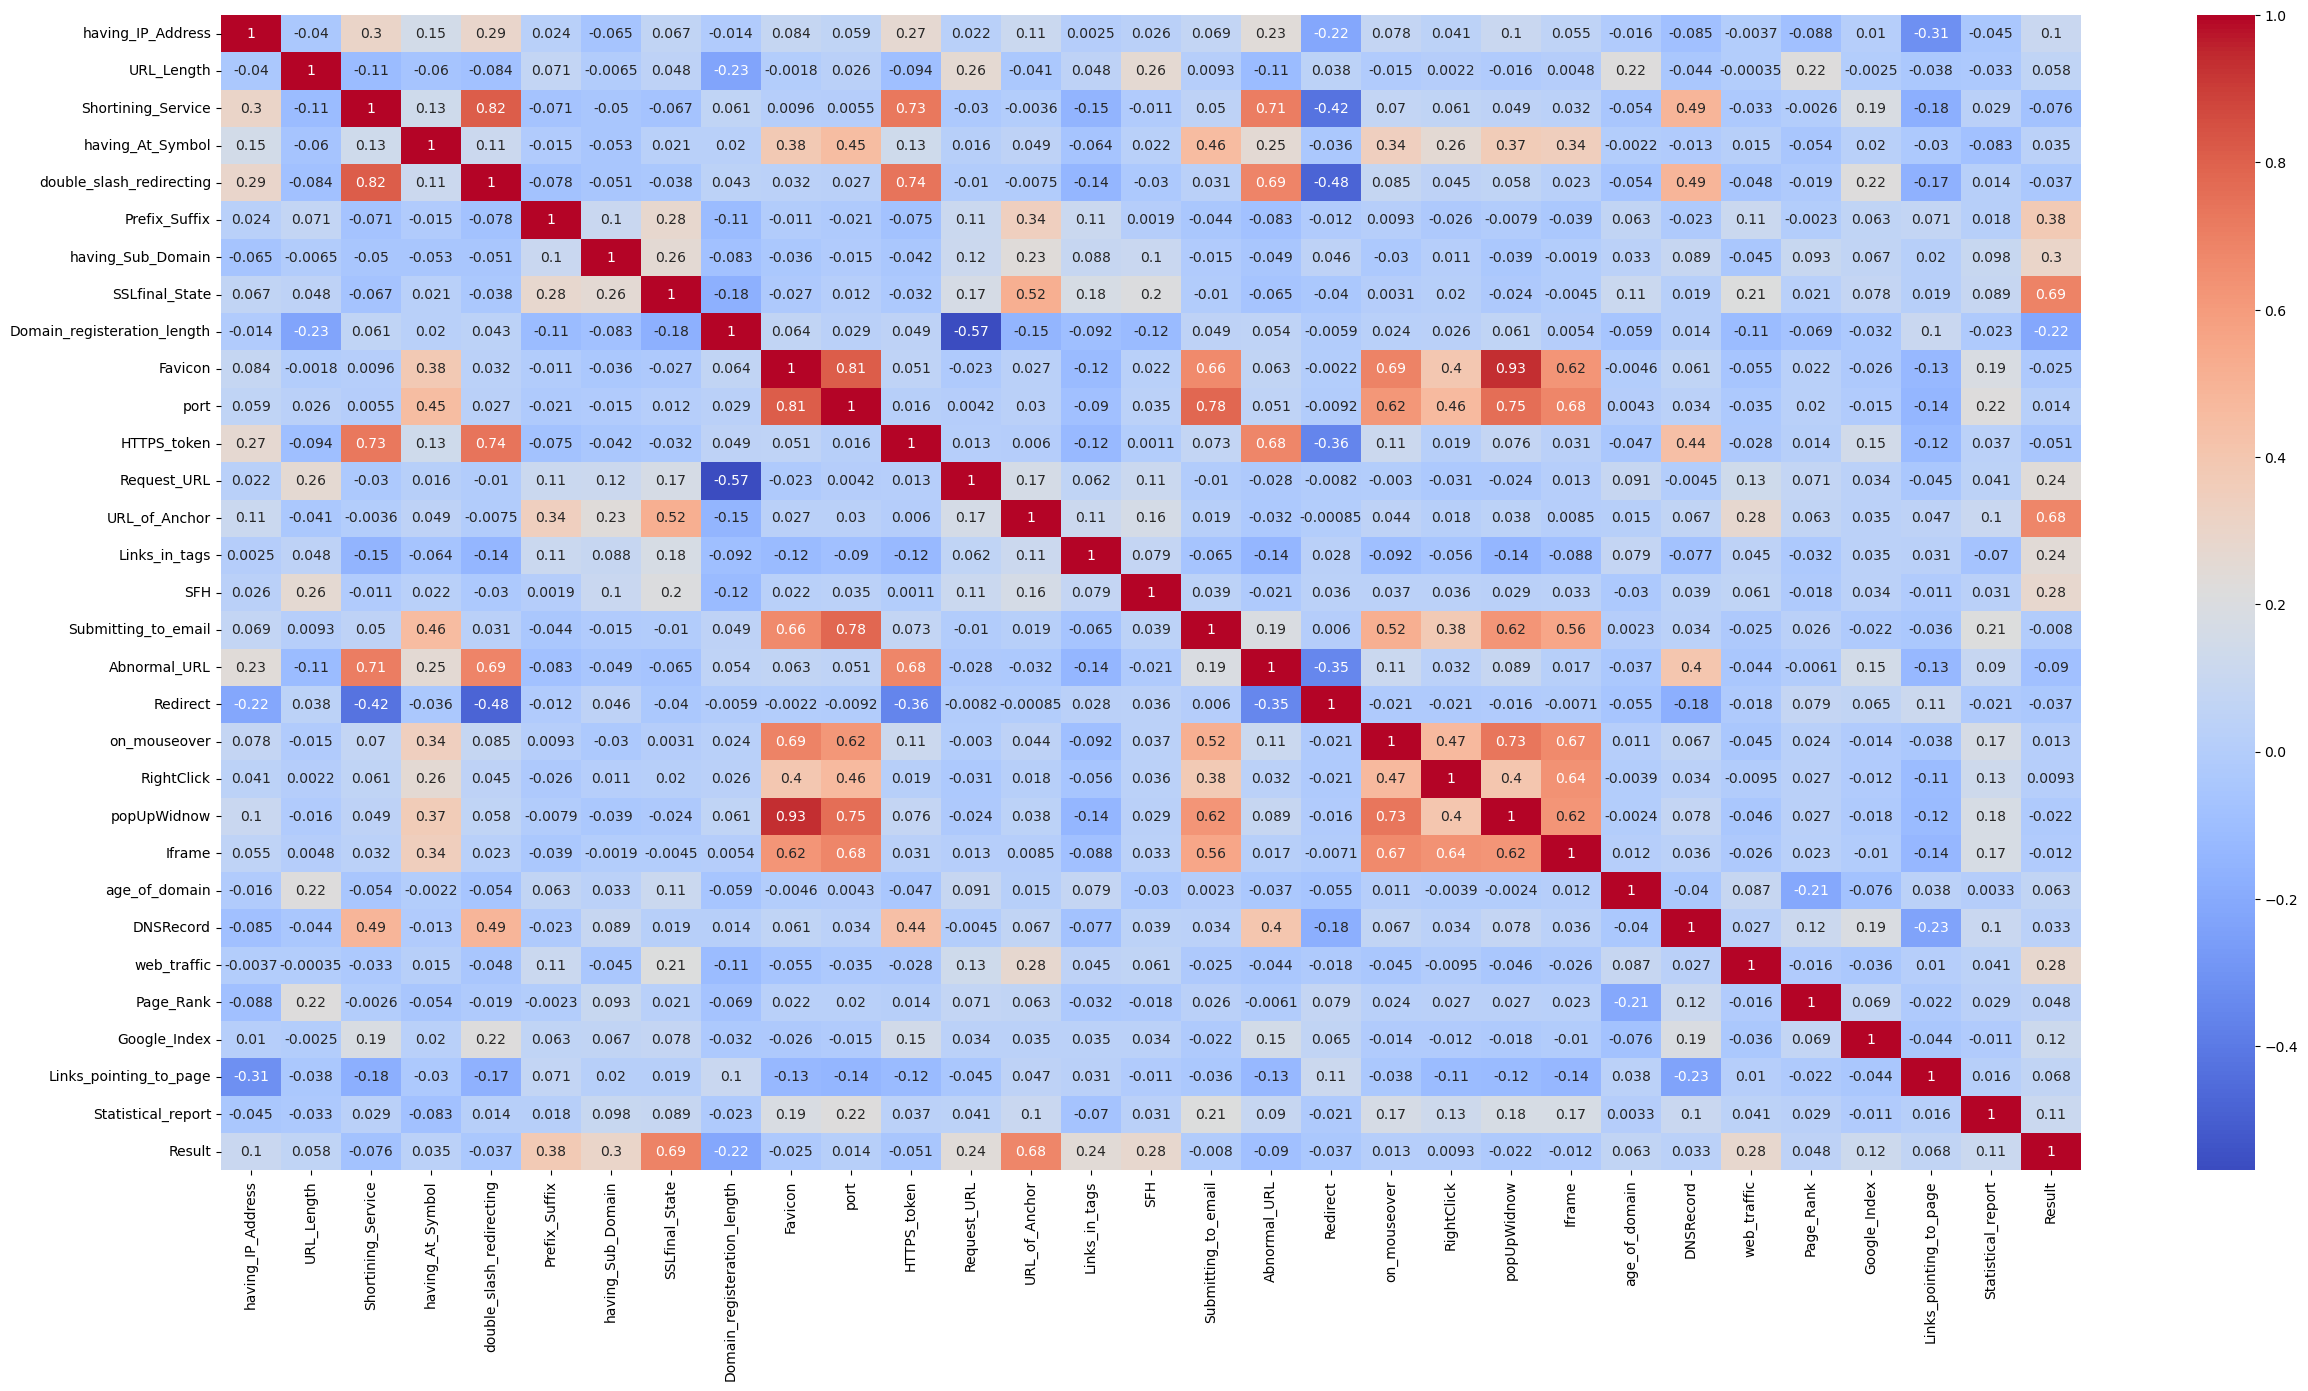

In [21]:
plt.figure(figsize=(30, 15))  # Adjust size as needed
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",xticklabels='auto',yticklabels='auto')
plt.show()

# Lets get top 20 correlations

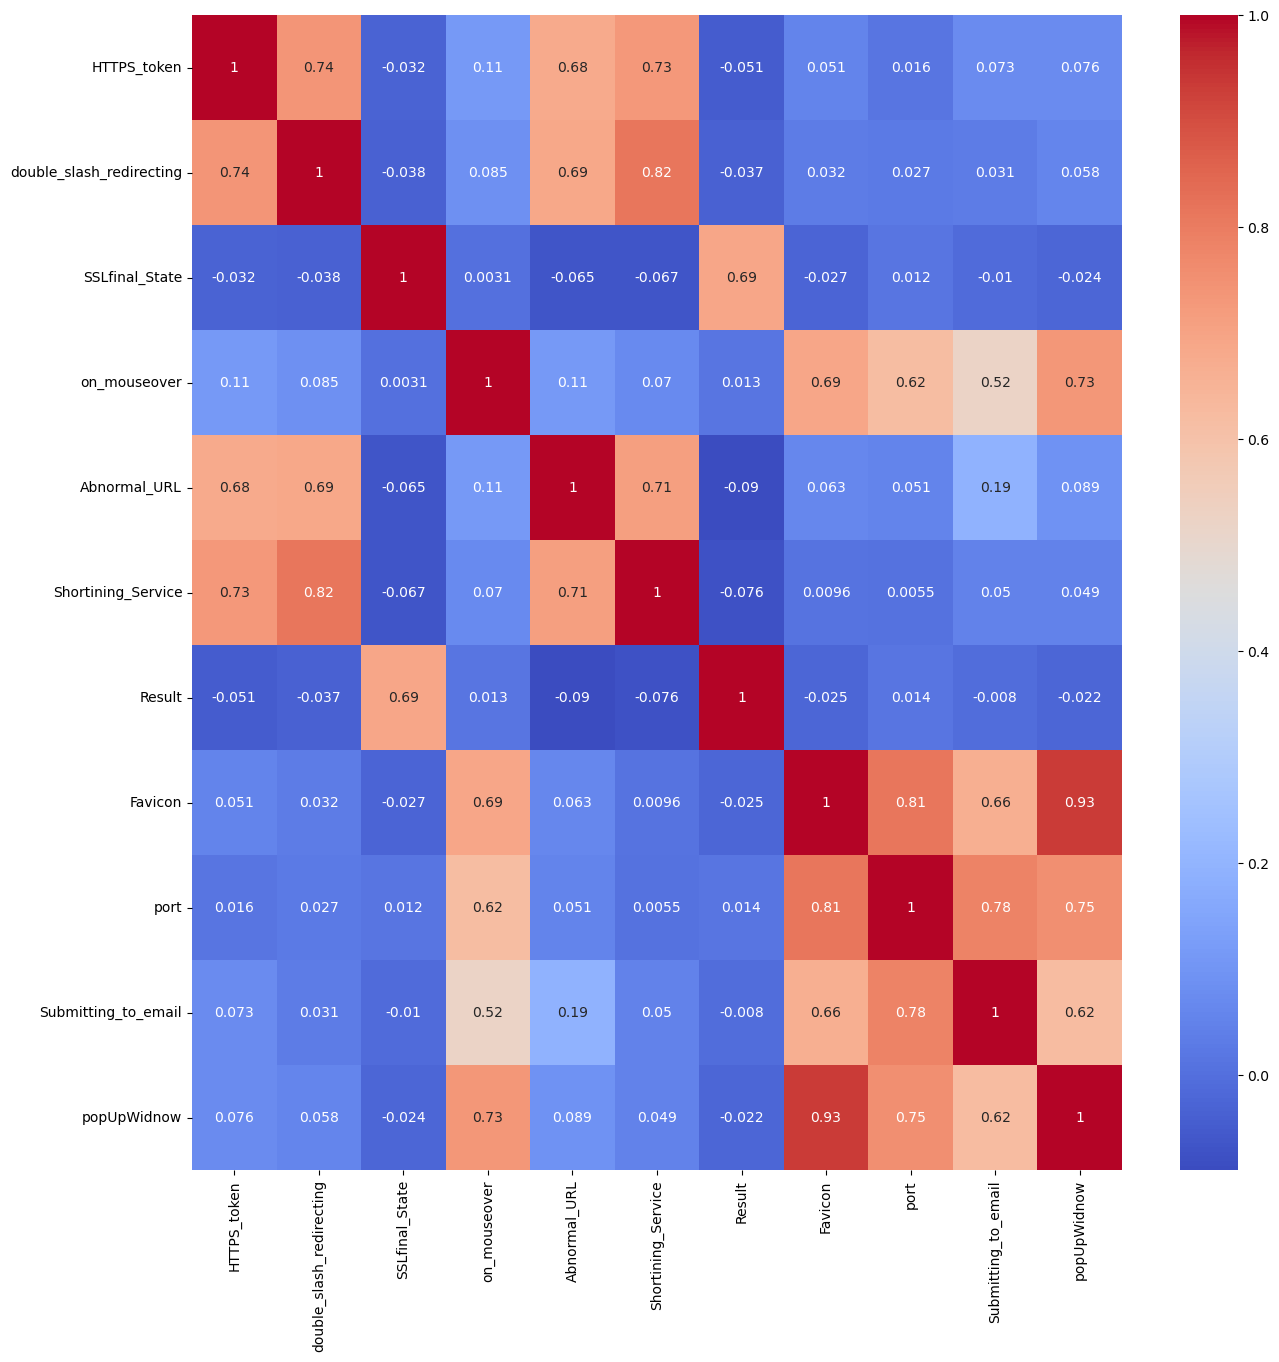

In [23]:
n = 20
correlations = df.corr().unstack().abs().sort_values(ascending=False)
top_correlations = correlations[correlations != 1].head(n)

# Extract corresponding columns
top_columns = list(set([col for pair in top_correlations.index for col in pair]))

# Plot heatmap for top correlated columns
plt.figure(figsize=(15, 15))
sns.heatmap(df[top_columns].corr(), annot=True, cmap="coolwarm")
plt.show()

In [24]:
# Insight. Below columns are co-related. 
# We can keep any one columns among below pair (either Favicon or popUpWidnow ) to reduce the curse of dimensionality.
# Favicon                      popUpWidnow                    0.933145
# popUpWidnow                  Favicon                        0.933145
# double_slash_redirecting     Shortining_Service             0.815809
# Shortining_Service           double_slash_redirecting       0.815809
# Favicon                      port                           0.812657

# Split to x and Y

In [26]:
x = df.drop("Result", axis = 1)
y = df[[df.columns[-1]]]

In [27]:
y.replace({-1: 0}, inplace=True)

# Train test and split

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 1)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4094, 30), (1755, 30), (4094, 1), (1755, 1))

In [31]:
pip install dagshub

Note: you may need to restart the kernel to use updated packages.


# Model Training

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

In [34]:
models = { "LR" : LogisticRegressionCV(),
          "SVC" : SVC(),
          "LSVC" : LinearSVC(),
          "RFC" : RandomForestClassifier(),
          "ABC" : AdaBoostClassifier(),
          "GBC" : GradientBoostingClassifier(),
          "XGBC" : XGBClassifier(),
          "DTC" : DecisionTreeClassifier(),
          "GNB" : GaussianNB()
         }

In [35]:
pip install dagshub

Note: you may need to restart the kernel to use updated packages.


In [36]:
import dagshub
dagshub.init(repo_owner='chetanfernandes',
             repo_name='End-to-End-ML-project-with-MLFlow',
             mlflow=True)

Accessing as ChetanFernandes

Initialized MLflow to track repo "chetanfernandes/End-to-End-ML-project-with-MLFlow"

Repository chetanfernandes/End-to-End-ML-project-with-MLFlow initialized!

In [37]:
import mlflow
with mlflow.start_run():
  mlflow.log_param('parameter name', 'value')
  mlflow.log_metric('metric name', 1)

🏃 View run legendary-newt-852 at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/0/runs/5e5f81c82c4b4f5a855b12bd59fbb284
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/0


In [49]:
Phising_experiment = mlflow.set_experiment("Phishing_1.2_test_data")

2024/12/12 13:03:07 INFO mlflow.tracking.fluent: Experiment with name 'Phishing_1.2_test_data' does not exist. Creating a new experiment.


Scores [92.55189255 91.08669109 93.28449328 92.06349206 91.68704156]
Mean Score 0.9213472211027224
AUC Score 0.9123820466244386
Model Score 0.9123820466244386


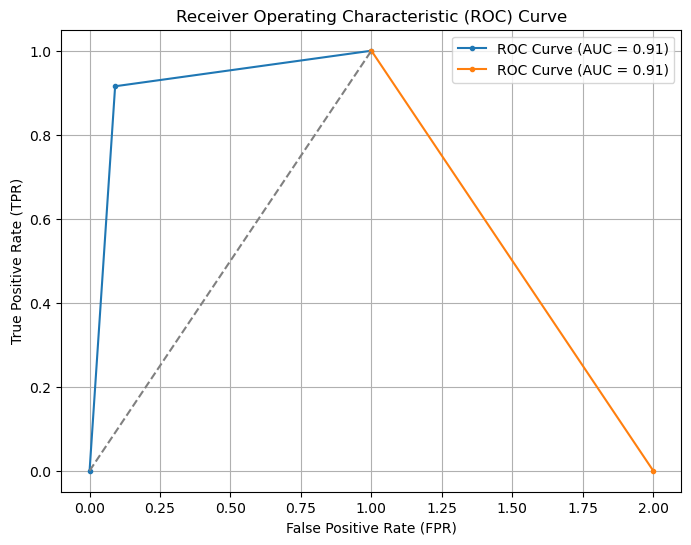

***********************************
🏃 View run LR at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4/runs/679d65fb527b4d3293453ae23fe041ac
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4
Scores [93.52869353 93.04029304 94.26129426 94.13919414 93.15403423]
Mean Score 0.9362470183986076
AUC Score 0.9367605956352697
Model Score 0.9367605956352697


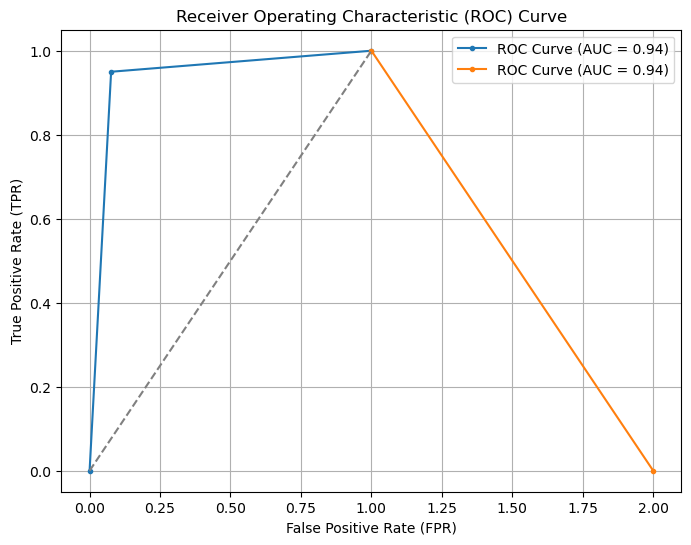

***********************************
🏃 View run SVC at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4/runs/17b757ddb4524c68a0db01b644284815
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4
Scores [92.18559219 91.20879121 93.16239316 92.7960928  91.68704156]
Mean Score 0.9220798218353231
AUC Score 0.9135238457094377
Model Score 0.9135238457094377


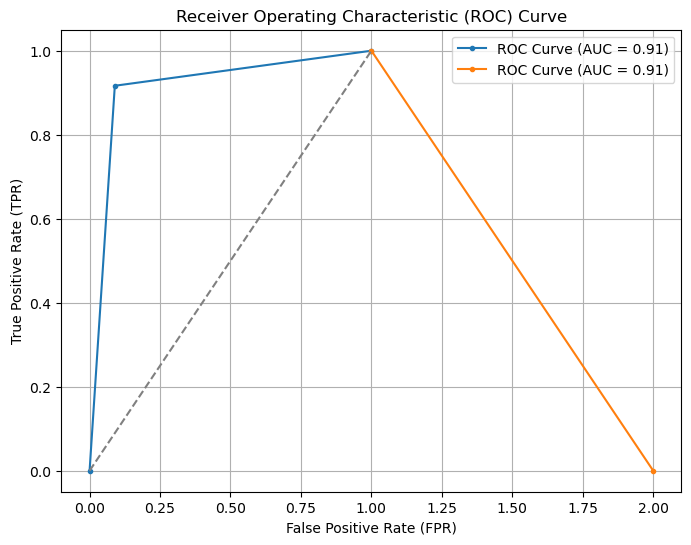

***********************************
🏃 View run LSVC at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4/runs/f67da2580d70455ca4515aa282484f10
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4
Scores [94.38339438 95.11599512 95.23809524 94.01709402 93.76528117]
Mean Score 0.9450397198563458
AUC Score 0.9470816786463404
Model Score 0.9470816786463404


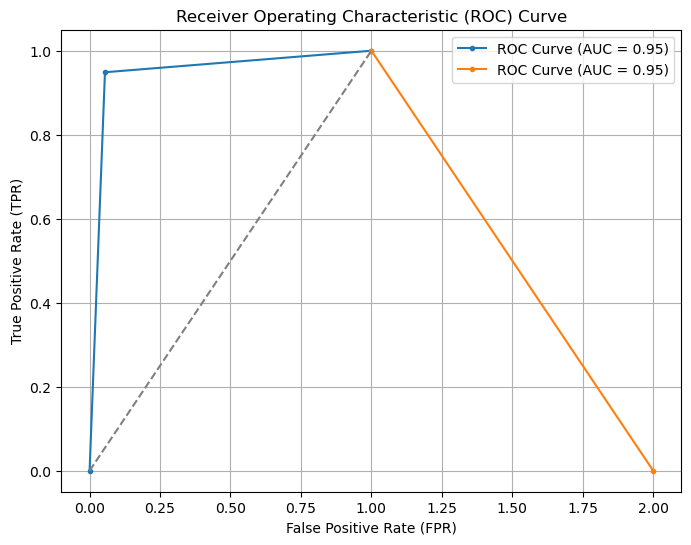

***********************************
🏃 View run RFC at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4/runs/8011d2135d174e718f2ea2b34b64f007
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4
Scores [93.52869353 92.18559219 93.16239316 94.01709402 93.39853301]
Mean Score 0.9325846118022157
AUC Score 0.9337307618239639
Model Score 0.9337307618239639


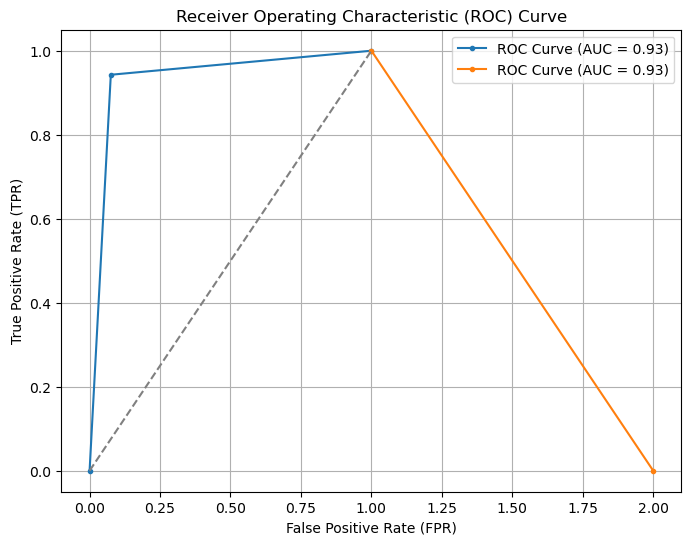

***********************************
🏃 View run ABC at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4/runs/e2d55490ad0c4d89a45820d901043651
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4
Scores [95.11599512 94.01709402 95.72649573 93.89499389 94.13202934]
Mean Score 0.9457732161888641
AUC Score 0.9439568575607269
Model Score 0.9439568575607269


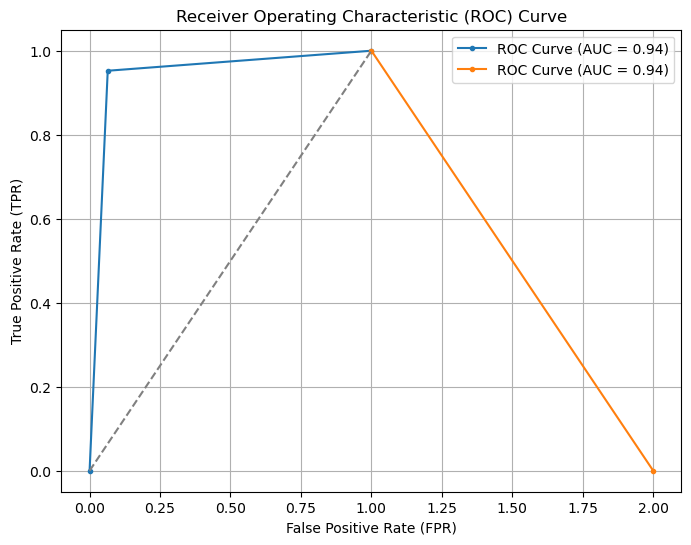

***********************************
🏃 View run GBC at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4/runs/af2d1bdcad854cb780feb5112f85e9e3
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4
Scores [95.6043956  95.48229548 94.99389499 94.38339438 94.00977995]
Mean Score 0.9489475208301613
AUC Score 0.9470816786463404
Model Score 0.9470816786463404


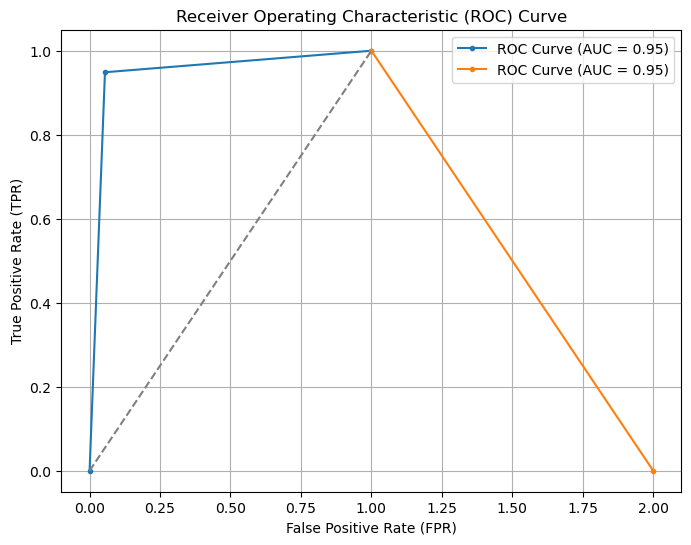

***********************************
🏃 View run XGBC at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4/runs/b6dfe9a9c82c4de381f9804f8350e104
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4
Scores [92.55189255 93.04029304 91.94139194 91.94139194 91.3202934 ]
Mean Score 0.9215905257470048
AUC Score 0.9222073741353556
Model Score 0.9222073741353556


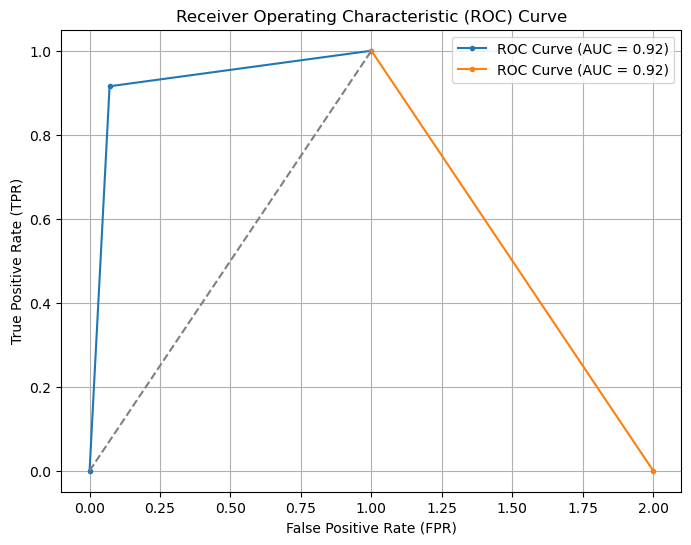

***********************************
🏃 View run DTC at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4/runs/f8be06c4ecd844969bcba3854cc38d14
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4
Scores [66.05616606 65.81196581 66.66666667 65.56776557 65.40342298]
Mean Score 0.6590119741708984
AUC Score 0.6519666269368296
Model Score 0.6519666269368296


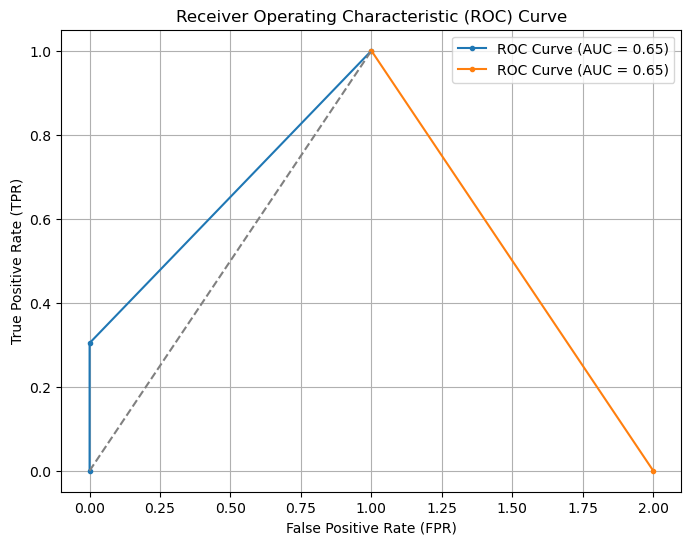

***********************************
🏃 View run GNB at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4/runs/97cc274617ef482c86a273cbb8081503
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4
Model with highest accuracy is -> 94.70816786463404. Model name is RFC


In [51]:
model_list = []
report = []
for i in range(len(models)):
    model = (list(models.values())[i])
    scores = cross_val_score(model, X_train, y_train, cv = 5)
    print("Scores", scores * 100)
    print("Mean Score", np.mean(scores))
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)
    model_score = accuracy_score(y_test,y_pred)
    
    metrics = {"auc_score": auc_score, "Accuracy Score": model_score}

    #print(classification_report(y_train,y_pred))
    #print(f" fpr {fpr}, tpr {tpr}, threshold {thresholds}")
    print("AUC Score", auc_score)
    print("Model Score", auc_score)
    #print(f"Accuracy score of {model} is {auc_score * 100}")
    report.append(auc_score*100)
    model_list.append(list(models.keys())[i])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr,thresholds, marker='.', label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid()
    plt.show()
    run_name = model_list[i]
    artifact_path = model_list[i]
    with mlflow.start_run(run_name=run_name) as run:
        # Log the parameters used for the model fit
        # mlflow.log_params(params)
    
        # Log the error metrics that were calculated during validation
        mlflow.log_metrics(metrics)
    
        # Log an instance of the trained model for later use
        model_info = mlflow.sklearn.log_model(sk_model= model, input_example=X_train, artifact_path=artifact_path)
        print("*"*35)
        
            
print(f"Model with highest accuracy is -> {max(report)}. Model name is {model_list[report.index(max(report))]}")

In [58]:
import mlflow
logged_model = 'runs:/fa242b50186e448eb4a9b7461beecc38/RFC'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

y_pred = loaded_model.predict(X_test)

In [ ]:
df = pd.DataFrame(X_test, columns = X_test.columns)

In [72]:
result = pd.DataFrame(X_test, columns=X_test.columns)
result["actual_class"] = y_test
result["predicted_class"] = y_pred
result['predicted_class'] = result['predicted_class'].map({0:"spam",1: "Notspam"})
result

having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
6059                  -1          -1                   1                -1   
2616                   1          -1                   1                -1   
9562                  -1          -1                   1                 1   
9667                  -1          -1                   1                -1   
759                    1           1                   1                 1   
8324                  -1          -1                   1                 1   
6004                   1          -1                   1                 1   
8760                   1          -1                   1                 1   
2684                  -1          -1                  -1                 1   
8441                  -1          -1                   1                -1   
8557                   1          -1                   1                 1   
8071                   1          -1                   1                 1   
5424                   1          -1                   1                 1   
8788                  -1          -1                   1                 1   
726                    1          -1                   1                 1   
10508                 -1          -1                   1                -1   
5304                   1           1                   1                 1   
3411                  -1          -1                  -1                 1   
10281                 -1          -1                   1                 1   
7003                   1          -1                   1                 1   
2816                   1           1                   1                -1   
5848                  -1          -1                   1                 1   
6356                   1          -1                   1                 1   
287                    1          -1                   1                -1   
8610                  -1           1                   1                 1   
1099                   1          -1                   1                 1   
8489                   1          -1                   1                 1   
5535                  -1           0                   1                 1   
9602                  -1          -1                   1                 1   
9358                  -1          -1                   1                 1   
8663                   1           1                   1                 1   
6900                   1          -1                   1                 1   
6070                   1           1                   1                -1   
303                    1          -1                   1                 1   
8643                   1          -1                   1                 1   
7730                  -1          -1                   1                -1   
5599                  -1          -1                   1                 1   
9164                   1          -1                   1                 1   
7239                  -1          -1                  -1                -1   
8848                  -1          -1                   1                 1   
457                    1          -1                   1                 1   
8295                  -1          -1                   1                -1   
9632                   1          -1                   1                 1   
2881                   1          -1                   1                -1   
10433                  1          -1                   1                 1   
10414                 -1          -1                  -1                -1   
1174                   1          -1                   1                 1   
179                    1          -1                   1                 1   
1122                  -1          -1                  -1                 1   
6374                  -1          -1                   1                 1   
5520                   1     

In [105]:
os.path.getsize(filepath)

0

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler 

In [30]:
pipeline = Pipeline([('scaler', RobustScaler())])

In [33]:
pipeline

Pipeline(steps=[('scaler', RobustScaler())])